In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Ejercicio 2

## Parte a)

In [11]:
def proximal_g(v, lambd, alfa):
  return np.sign(v) * np.maximum(0, np.abs(v) - alfa * lambd)

## Parte b)

In [12]:
def proximal_f(v, A, b, alfa):
  return np.linalg.inv(np.identity(A.shape[1]) + alfa * A.T @ A) @ (alfa * A.T @ b + v)

## Parte c)

In [13]:
def gradiente_f(x, A, b):
  return A.T @ (A @ x - b)

def paso_PGD(x, lambd, A, b, alfa):
  return proximal_g(x - alfa * gradiente_f(x, A, b), lambd, alfa)

def funcion_LASSO(x, A, b, lambd):
  return 1/2 * np.linalg.norm(A @ x - b, 2)**2 + lambd * np.linalg.norm(x, 1)

def proximal_gradient_descent(A, b, lambd, alfa, epsilon=0.0001, max_iter=1000):
  m, n = A.shape
  x = np.zeros(n) # Inicializacion
  valores_objetivo = [funcion_LASSO(x, A, b, lambd)]
  for i in range(max_iter):
    x = paso_PGD(x, lambd, A, b, alfa)

    valores_objetivo.append(funcion_LASSO(x, A, b, lambd))

    # Condicion de parada
    if abs(valores_objetivo[-1] - valores_objetivo[-2]) < epsilon:
      break

  return x, valores_objetivo

# Se cargan los datos del problema
A = np.loadtxt("A.asc")
b = np.loadtxt("b.asc")

# Parámetros
lambd = 0.15
alfa = 1 / np.linalg.norm(A.T @ A , 2)

t_ini = time.time()

x_opt, valores_objetivo_c = proximal_gradient_descent(A, b, lambd, alfa)

t_tot = time.time()-t_ini

print('x óptimo después de ', len(valores_objetivo_c)-1,' iteraciones: ', x_opt)
print('Tiempo de ejecución: ', t_tot, ' s')
print('Valor final, función objetivo: ', valores_objetivo_c[-1])

x óptimo después de  32  iteraciones:  [-0.13283252  0.12737118]
Tiempo de ejecución:  0.0017845630645751953  s
Valor final, función objetivo:  6.712630453238502


## Parte d)

### alfa = 0.0001

In [14]:
def ADMM(A, b, lambd, alfa, epsilon=0.0001, max_iter=1000):
  m, n = A.shape

  # Inicializacion
  x = np.zeros(n)
  z = np.zeros(n)
  u = np.zeros(n)
  valores_objetivo = [funcion_LASSO(x, A, b, lambd)]

  for i in range(max_iter):
    x = proximal_f(z - u, A, b, alfa)
    z = proximal_g(x + u, lambd, alfa)
    u = u + x - z

    valores_objetivo.append(funcion_LASSO(x, A, b, lambd))

    # Condicion de parada
    if abs(valores_objetivo[-1] - valores_objetivo[-2]) < epsilon:
      break

  return x, valores_objetivo

# Parametros
lambd = 0.15

t_ini = time.time()

x_opt, valores_objetivo_d1 = ADMM(A, b, lambd, 0.0001)

t_tot = time.time()-t_ini

print('x óptimo después de ', len(valores_objetivo_d1)-1,' iteraciones: ', x_opt)
print('Tiempo de ejecución: ', t_tot, ' s')
print('Valor final, función objetivo: ', valores_objetivo_d1[-1])

x óptimo después de  37  iteraciones:  [-0.13283263  0.1272908 ]
Tiempo de ejecución:  0.02492690086364746  s
Valor final, función objetivo:  6.712694733254487


### alfa = 0.001

In [15]:
t_ini = time.time()

x_opt, valores_objetivo_d2 = ADMM(A, b, lambd, 0.001)

t_tot = time.time()-t_ini

print('x óptimo después de ', len(valores_objetivo_d2)-1,' iteraciones: ', x_opt)
print('Tiempo de ejecución: ', t_tot, ' s')
print('Valor final, función objetivo: ', valores_objetivo_d2[-1])

x óptimo después de  8  iteraciones:  [-0.13283194  0.12777082]
Tiempo de ejecución:  0.004245281219482422  s
Valor final, función objetivo:  6.712463354359534


### alfa = 0.01

In [16]:
t_ini = time.time()

x_opt, valores_objetivo_d3 = ADMM(A, b, lambd, 0.01)

t_tot = time.time()-t_ini

print('x óptimo después de ', len(valores_objetivo_d3)-1,' iteraciones: ', x_opt)
print('Tiempo de ejecución: ', t_tot, ' s')
print('Valor final, función objetivo: ', valores_objetivo_d3[-1])

x óptimo después de  4  iteraciones:  [-0.13283185  0.12783212]
Tiempo de ejecución:  0.006411552429199219  s
Valor final, función objetivo:  6.712460185964511


### alfa = 0.1

In [17]:
t_ini = time.time()

x_opt, valores_objetivo_d4 = ADMM(A, b, lambd, 0.1)

t_tot = time.time()-t_ini

print('x óptimo después de ', len(valores_objetivo_d4)-1,' iteraciones: ', x_opt)
print('Tiempo de ejecución: ', t_tot, ' s')
print('Valor final, función objetivo: ', valores_objetivo_d4[-1])

x óptimo después de  3  iteraciones:  [-0.13283183  0.12783336]
Tiempo de ejecución:  0.002368450164794922  s
Valor final, función objetivo:  6.712460183523188


## Parte e)

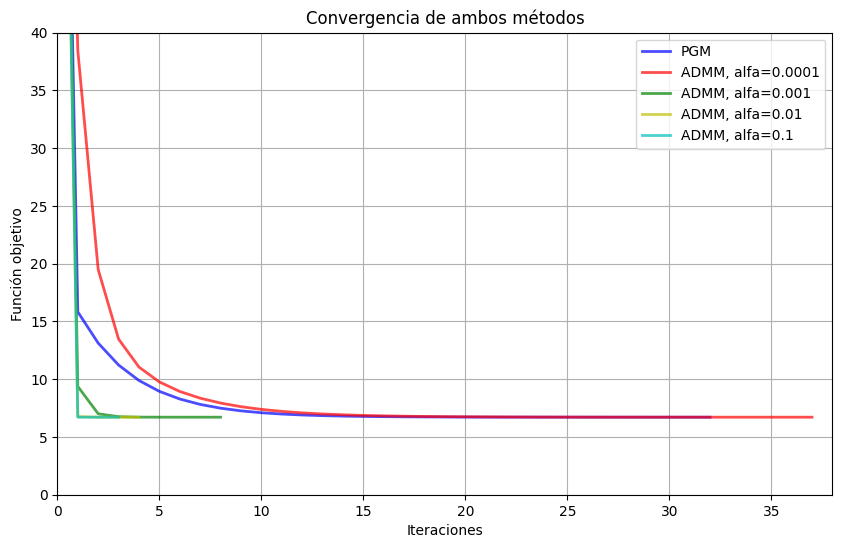

In [18]:
# Evolución de la función objetivo
plt.figure(figsize=(10, 6))
plt.plot(range(0,len(valores_objetivo_c)), valores_objetivo_c, 'b', lw=2, label='PGM', alpha=0.7)
plt.plot(range(0,len(valores_objetivo_d1)), valores_objetivo_d1, 'r', lw=2, label='ADMM, alfa=0.0001', alpha=0.7)
plt.plot(range(0,len(valores_objetivo_d2)), valores_objetivo_d2, 'g', lw=2, label='ADMM, alfa=0.001', alpha=0.7)
plt.plot(range(0,len(valores_objetivo_d3)), valores_objetivo_d3, 'y', lw=2, label='ADMM, alfa=0.01', alpha=0.7)
plt.plot(range(0,len(valores_objetivo_d4)), valores_objetivo_d4, 'c', lw=2, label='ADMM, alfa=0.1', alpha=0.7)
plt.title("Convergencia de ambos métodos")
plt.xlabel("Iteraciones")
plt.ylabel("Función objetivo")
plt.ylim(0,40)
plt.xlim(0,38)
plt.legend()
plt.grid(True)